In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import FittingWorkCleaner as FWC

In [2]:
data= np.load("mass-300-life-0.030.npz", allow_pickle=True)
print(data.files)

['mass', 'mixing', 'lifetime', 'neff', 'scalefactors', 'time', 'temp', 'Tcm', 'e', 'fe', 'NumbDensityDist', 'decayrate', 'collisionrate', 'n_p_rate', 'p_n_rate']


In [29]:
f_actual = data['fe'][-1]
e_actual = data['e'][-1]
mass_data = data['mass']

In [4]:
print(e_actual.shape)
print(f_actual.shape)

(564,)
(564,)


In [32]:
print(mass_data)

300.0


In [5]:
data_2= np.load("mass-300-life-0.584.npz", allow_pickle=True)
print(data_2.files)

['mass', 'mixing', 'lifetime', 'neff', 'scalefactors', 'time', 'temp', 'Tcm', 'e', 'fe', 'NumbDensityDist', 'decayrate', 'collisionrate', 'n_p_rate', 'p_n_rate']


In [6]:
f_actual_2 = data_2['fe'][-1]
e_actual_2 = data_2['e'][-1]

In [7]:
print(e_actual_2.shape)
print(f_actual_2.shape)

(494,)
(494,)


In [8]:
def please_work(filename,poly_degree,plot):
    actual_data = np.load(filename,allow_pickle=True)
    f_actual = actual_data['fe'][-1]
    e_actual = actual_data['e'][-1]
    FWC.everything_poly(e_actual,f_actual,poly_degree,plot)

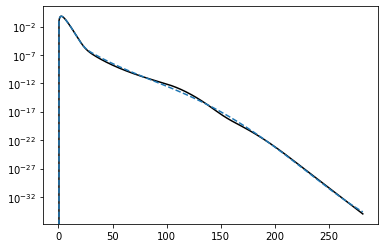

In [9]:
please_work("mass-300-life-0.030.npz",4,True)

/Users/charmquark/Downloads/M_nu_sterile_decay/FittingWorkCleaner.py:90: RuntimeWarning: overflow encountered in exp
  diff_reverse[i] = (f_array_reverse[i])-((Nbest)/(np.exp(e_array_reverse[i]/Tbest)+1))
/Users/charmquark/Downloads/M_nu_sterile_decay/FittingWorkCleaner.py:117: RuntimeWarning: overflow encountered in exp
  plt.semilogy(e_array,N_best*(e_array**2)/(np.exp(e_array/T_best)+1)+e_array**2*np.exp(polynomial(e_array)),linestyle='--')


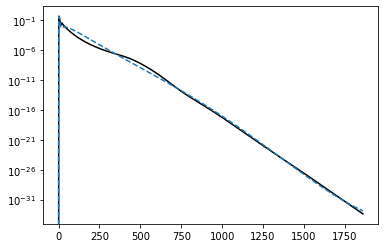

In [10]:
please_work("mass-300-life-0.584.npz",4,True)

In [11]:
T_b,N_b,Co,= FWC.everything_poly(e_actual,f_actual,4,False)

In [12]:
polynom = np.poly1d(Co)
print(np.trapz(e_actual**2*f_actual))
print(np.trapz(N_b*(e_actual**2)/(np.exp(e_actual/T_b)+1)+e_actual**2*np.exp(polynom(e_actual))))

print(np.trapz(e_actual**3*f_actual))
print(np.trapz(N_b*(e_actual**3)/(np.exp(e_actual/T_b)+1)+e_actual**3*np.exp(polynom(e_actual))))

5.8058348458432665
5.829118649320976
21.775977940174926
21.861221884383497


In [13]:
Buck = 21.775977940174926/21.861221884383497

In [14]:
polynom = np.poly1d(Co)
print(np.trapz(e_actual**2*f_actual))
print(np.trapz(Buck*N_b*(e_actual**2)/(np.exp(e_actual/T_b)+1)+e_actual**2*np.exp(polynom(e_actual)+np.log(Buck))))

print(np.trapz(e_actual**3*f_actual))
print(np.trapz(Buck*N_b*(e_actual**3)/(np.exp(e_actual/T_b)+1)+e_actual**3*np.exp(polynom(e_actual)+np.log(Buck))))

5.8058348458432665
5.8063890385263095
21.775977940174926
21.775977940174926


In [15]:
k = 200
e_actual_2_shorter = np.delete(e_actual_2,np.s_[-k:])
f_actual_2_shorter = np.delete(f_actual_2,np.s_[-k:])

/Users/charmquark/Downloads/M_nu_sterile_decay/FittingWorkCleaner.py:90: RuntimeWarning: overflow encountered in exp
  diff_reverse[i] = (f_array_reverse[i])-((Nbest)/(np.exp(e_array_reverse[i]/Tbest)+1))
/Users/charmquark/Downloads/M_nu_sterile_decay/FittingWorkCleaner.py:117: RuntimeWarning: overflow encountered in exp
  plt.semilogy(e_array,N_best*(e_array**2)/(np.exp(e_array/T_best)+1)+e_array**2*np.exp(polynomial(e_array)),linestyle='--')


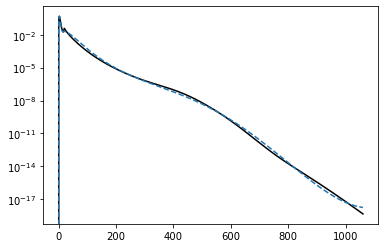

In [16]:
T_bes,N_bes,Coef = FWC.everything_poly(e_actual_2_shorter,f_actual_2_shorter,4,True)

In [17]:
polynomia = np.poly1d(Coef)
print(np.trapz(e_actual_2_shorter**2*f_actual_2_shorter))
print(np.trapz(N_bes*(e_actual_2_shorter**2)/(np.exp(e_actual_2_shorter/T_bes)+1)+e_actual_2_shorter**2*np.exp(polynomia(e_actual_2_shorter))))

print(np.trapz(e_actual_2_shorter**3*f_actual_2_shorter))
print(np.trapz(N_bes*(e_actual_2_shorter**3)/(np.exp(e_actual_2_shorter/T_bes)+1)+e_actual_2_shorter**3*np.exp(polynomia(e_actual_2_shorter))))

5.321136409564899
5.153146106695982
28.34533597368343
28.030035139964586


/var/folders/4_/8dqxg1mn27s2m8nmvf9r3nkh0000gp/T/ipykernel_63205/2622468764.py:3: RuntimeWarning: overflow encountered in exp
  print(np.trapz(N_bes*(e_actual_2_shorter**2)/(np.exp(e_actual_2_shorter/T_bes)+1)+e_actual_2_shorter**2*np.exp(polynomia(e_actual_2_shorter))))
/var/folders/4_/8dqxg1mn27s2m8nmvf9r3nkh0000gp/T/ipykernel_63205/2622468764.py:6: RuntimeWarning: overflow encountered in exp
  print(np.trapz(N_bes*(e_actual_2_shorter**3)/(np.exp(e_actual_2_shorter/T_bes)+1)+e_actual_2_shorter**3*np.exp(polynomia(e_actual_2_shorter))))


In [18]:
Buck1 = 28.34533597368343/28.030035139964586

polynomia = np.poly1d(Coef)
print(np.trapz(e_actual_2_shorter**2*f_actual_2_shorter))
print(np.trapz(Buck1*N_bes*(e_actual_2_shorter**2)/(np.exp(e_actual_2_shorter/T_bes)+1)+e_actual_2_shorter**2*np.exp(polynomia(e_actual_2_shorter)+np.log(Buck1))))

print(np.trapz(e_actual_2_shorter**3*f_actual_2_shorter))
print(np.trapz(Buck1*N_bes*(e_actual_2_shorter**3)/(np.exp(e_actual_2_shorter/T_bes)+1)+e_actual_2_shorter**3*np.exp(polynomia(e_actual_2_shorter)+np.log(Buck1))))


5.321136409564899
5.211112186852609
28.34533597368343
28.345335973683426


/var/folders/4_/8dqxg1mn27s2m8nmvf9r3nkh0000gp/T/ipykernel_63205/122514119.py:5: RuntimeWarning: overflow encountered in exp
  print(np.trapz(Buck1*N_bes*(e_actual_2_shorter**2)/(np.exp(e_actual_2_shorter/T_bes)+1)+e_actual_2_shorter**2*np.exp(polynomia(e_actual_2_shorter)+np.log(Buck1))))
/var/folders/4_/8dqxg1mn27s2m8nmvf9r3nkh0000gp/T/ipykernel_63205/122514119.py:8: RuntimeWarning: overflow encountered in exp
  print(np.trapz(Buck1*N_bes*(e_actual_2_shorter**3)/(np.exp(e_actual_2_shorter/T_bes)+1)+e_actual_2_shorter**3*np.exp(polynomia(e_actual_2_shorter)+np.log(Buck1))))


In [19]:
@nb.jit(nopython=True)
def cdf_faster(e,f):
    r = np.zeros(len(e))
    
    y = e**2 * f
    for i in range(1, len(r)):
        r[i] = r[i-1] + 0.5 * (y[i-1] + y[i]) * (e[i]-e[i-1])
        
    r /= np.trapz(y,e)
    
    return r



In [20]:
R = cdf_faster(e_actual,f_actual)

In [21]:
Q = cdf_faster(e_actual_2,f_actual_2)

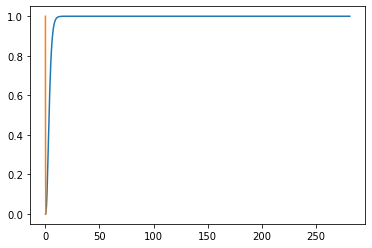

In [22]:
plt.figure()
plt.plot(e_actual, R)
plt.plot(f_actual,R)
plt.show()

In [23]:
np.where(cdf_faster(e_actual,f_actual)>0.9999)[0][0]

34

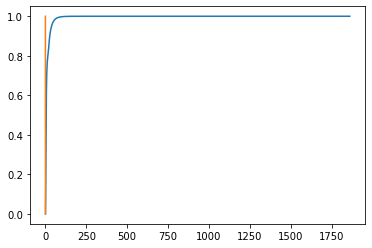

In [24]:
plt.figure()
plt.plot(e_actual_2,Q)
plt.plot(f_actual_2,Q)
plt.show()

In [25]:
np.where(cdf_faster(e_actual_2,f_actual_2)>0.80)[0][0]

31

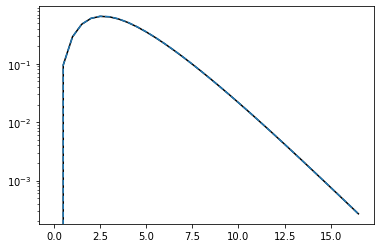

(1.1896452574418677,
 0.9597880757044976,
 array([-4.18485322e-03,  2.24917692e-01, -4.50647499e+00,  3.94343274e+01,
        -1.40372095e+02]))

In [26]:
FWC.finale(e_actual,f_actual,4,True)

In [27]:
FWC.finale(e_actual_2,f_actual_2,4,False)

(1.2335436064249623,
 0.6850939103999747,
 array([ 1.14347633e-09, -1.60098091e-06,  6.68093687e-04, -1.56469746e-01,
        -6.86539040e+00]))